In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('countrycluster.csv')

In [7]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


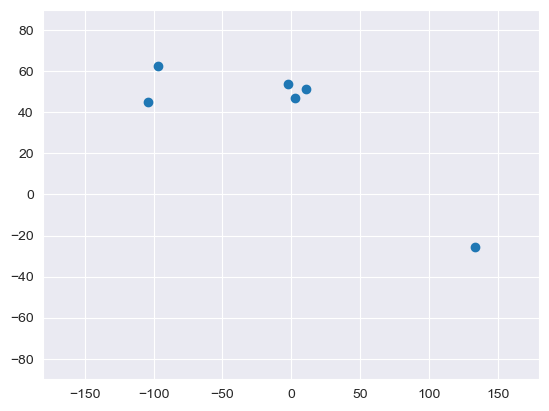

In [8]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [9]:
x = data.iloc[:,1:3].values

In [10]:
x

array([[  44.97, -103.77],
       [  62.4 ,  -96.8 ],
       [  46.75,    2.4 ],
       [  54.01,   -2.53],
       [  51.15,   10.4 ],
       [ -25.45,  133.11]])

In [11]:
kmeans = KMeans(3)

In [12]:
kmeans.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
identified_cluster = kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
identified_cluster

array([0, 0, 2, 2, 2, 1])

In [15]:
data_with_cluster = data.copy()

In [16]:
data_with_cluster

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [17]:
data_with_cluster['cluster']= identified_cluster

In [18]:
data_with_cluster

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


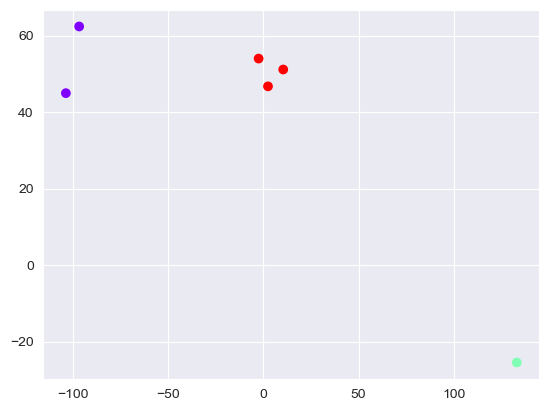

In [20]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow' )


# Elbow Method

In [22]:
wcss =[]
for i in range(1,7):
    Kmeans = KMeans(i)
    Kmeans.fit(x)
    wcss_iter = Kmeans.inertia_
    wcss.append(wcss_iter)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [23]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

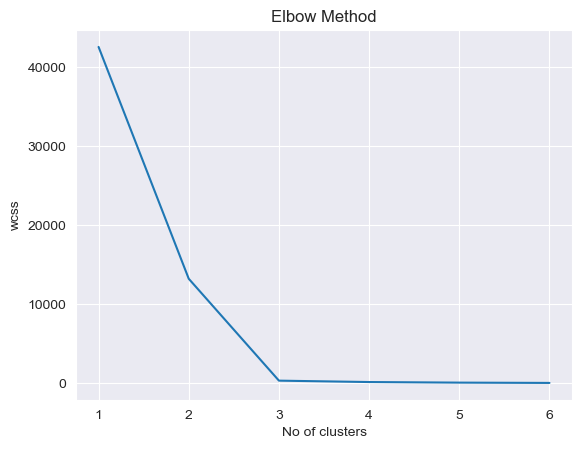

In [25]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

# MEanShift

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [27]:
data = pd.read_csv('clusterexample.csv')

In [28]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


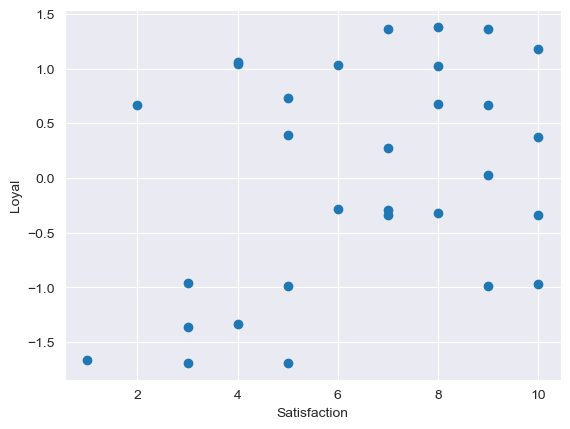

In [31]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyal')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
x = data.iloc[:,0:2].values

In [36]:
x

array([[ 4.  , -1.33],
       [ 6.  , -0.28],
       [ 5.  , -0.99],
       [ 7.  , -0.29],
       [ 4.  ,  1.06],
       [ 1.  , -1.66],
       [10.  , -0.97],
       [ 8.  , -0.32],
       [ 8.  ,  1.02],
       [ 8.  ,  0.68],
       [10.  , -0.34],
       [ 5.  ,  0.39],
       [ 5.  , -1.69],
       [ 2.  ,  0.67],
       [ 7.  ,  0.27],
       [ 9.  ,  1.36],
       [ 8.  ,  1.38],
       [ 7.  ,  1.36],
       [ 7.  , -0.34],
       [ 9.  ,  0.67],
       [10.  ,  1.18],
       [ 3.  , -1.69],
       [ 4.  ,  1.04],
       [ 3.  , -0.96],
       [ 6.  ,  1.03],
       [ 9.  , -0.99],
       [10.  ,  0.37],
       [ 9.  ,  0.03],
       [ 3.  , -1.36],
       [ 5.  ,  0.73]])

In [40]:
x_scaled = sc.fit_transform(x)

In [41]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [42]:
from sklearn.cluster import MeanShift

In [43]:
meanshift = MeanShift()

In [44]:
meanshift.fit(x_scaled)

MeanShift()

In [45]:
identified_cluster1=meanshift.predict(x_scaled)

In [46]:
identified_cluster1

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

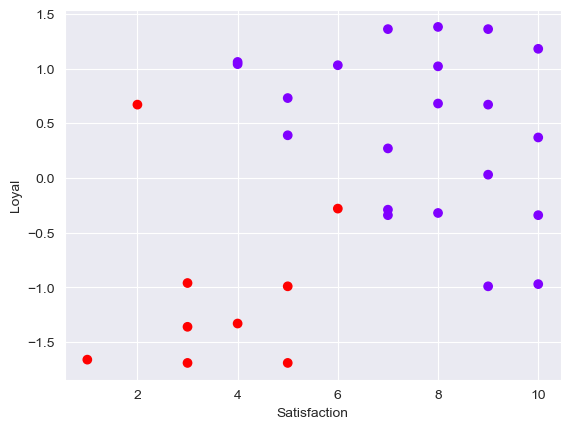

In [50]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c =identified_cluster1,cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyal')
plt.show()